# Datasets & DataLoaders



**Code for processing data samples can get messy and hard to maintain; We ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives:**
**torch.utils.data.DataLoader and torch.utils.Data.Dataset that allow you to use pre-loaded datasets as well as your own data.
Dataset stores the samples and their corresponding labels and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.**

## Loading a Dataset

Here is an example of how to load the Fashion-MNIST dataset from torchVision.
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each examples comprises a 28X28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:


root is the path where the train/test data is stored,

train specifies training or test dataset,

download=True downloads the data from the internet if it’s not available at root.

transform and target_transform specify the feature and label transformations

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download = True,
    transform = ToTensor()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [24:19<00:00, 18.1kB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 59.0kB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:15<00:00, 283kB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]


## Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_label

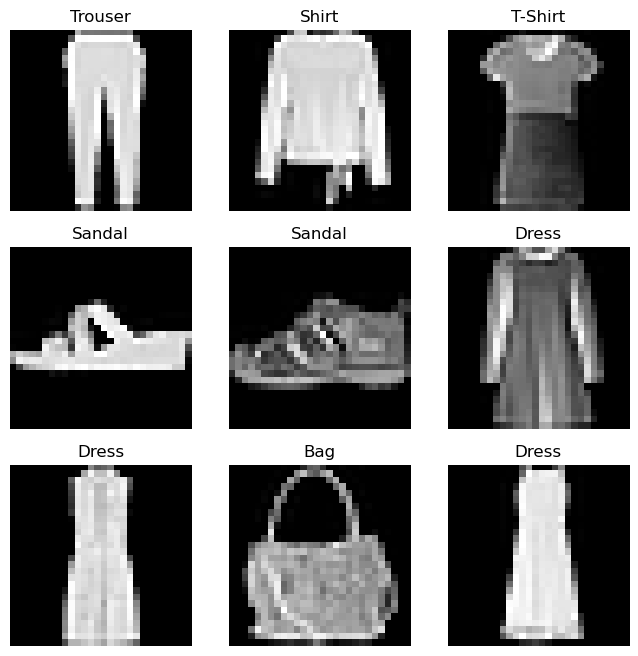

In [6]:
%time
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.ratraining_dataint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
%%time
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Wall time: 0 ns


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


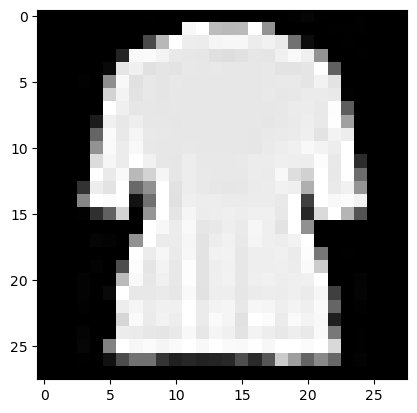

Label: 0


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
